In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sif_parser

from ipywidgets import widgets, interact

In [2]:
%matplotlib widget

In [3]:
plt.rcParams['figure.figsize'] = [6, 4]

In [4]:
file_dir = '/mnt/e/東大/研究/20240429_spectrometer_calibration/240430/'
file = glob.glob(file_dir+'*sif')

In [5]:
data, info = sif_parser.np_open(file[0])
data = data.squeeze()

interactive(children=(Dropdown(description='f', options=('00 Ne dial359.8nm width0.5s accumulate40.sif', '01 N…

<function __main__.update(f, c)>

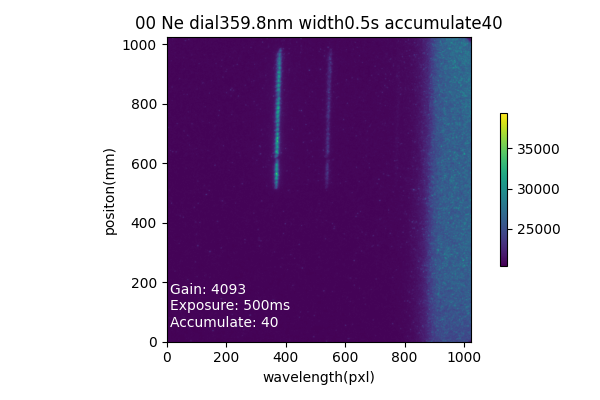

In [6]:
fig, ax = plt.subplots()

im = ax.imshow(data, origin='lower')
fig.colorbar(im, shrink=0.5)

ax.set_xlabel('wavelength(pxl)')
ax.set_ylabel('positon(mm)')

txt = ax.text(0.01, 0.05, 'Gain: %i \nExposure: %ims \nAccumulate: %i' 
        %(info['GainDAC'], info['ExposureTime']*1e3, info['AccumulatedCycles']), 
        transform=ax.transAxes, color='w')
tlt = ax.set_title(os.path.split(file[0])[-1][:-4])
fig.tight_layout()

def update(f, c):
    
    file = os.path.join('/mnt/e/東大/研究/20240429_spectrometer_calibration/240430/', f)
    
    data, info = sif_parser.np_open(file)
    im.set_data(data[0, :, :])
    im.autoscale()
    
    txt.set_text('Gain: %i \nExposure: %ims \nAccumulate: %i' 
                %(info['GainDAC'], info['ExposureTime']*1e3, info['AccumulatedCycles']))
    tlt.set_text(os.path.split(file)[-1][:-4])

    
    if c:

        x, bins = np.histogram(data.ravel(), bins=256)
        bins_center = ((bins[:-1] + bins[1:])/2)
        idx_09 = np.abs((np.cumsum(x)/data.size - 0.90)).argmin() # get where the accumualted density is equal to 0.9
        
        im.set_clim(vmax=bins_center[idx_09])


file_names = [f.split('/')[-1] for f in file]

folder_select = widgets.Select(
                options=file_names,
                description='Files:',
                disabled=True)

w = interact(update, f=file_names, c=False)
w

In [9]:
df = pd.read_csv('./nist lines.csv')
df.set_index(['element', 'No.'], inplace=True)

In [10]:
useful_cols = ['obs_wl_air(nm)', 'intens', 'Acc', 'Aki(s^-1)', 'line_ref']
idx = np.logical_and.reduce((df['obs_wl_air(nm)']>700, df['obs_wl_air(nm)']<705, df.intens_f>400))
df[idx][useful_cols].loc['Neon']

,obs_wl_air(nm),intens,Acc,Aki(s^-1),line_ref
No.,,,,,
646,702.40500,34000,B+,1890000.0,L3451
647,703.24128,85000,B+,26600000.0,L3451


In [11]:
# useful_cols = ['obs_wl_air(nm)', 'intens', 'Acc', 'Aki(s^-1)']
idx = np.logical_and.reduce((df['obs_wl_air(nm)']>700, df['obs_wl_air(nm)']<705, df.intens_f>400))
df[idx][useful_cols].loc['Neon']

def update(m):
    idx = np.logical_and.reduce((df['obs_wl_air(nm)']>m[0], df['obs_wl_air(nm)']<m[1], df.intens_f>400))
    return df[idx][useful_cols].loc['Neon']

intslider = widgets.IntRangeSlider(min=350, max=800, step=1)

interact(update, m=intslider)

interactive(children=(IntRangeSlider(value=(462, 687), description='m', max=800, min=350), Output()), _dom_cla…

<function __main__.update(m)>